# Data Processing Notebook.

> The intent of this notebook is to generate a clean and usable dataset for machine learning purposes. Some cells also generate relevant graphs. 

## 1. Reading Data

> This section is dedicated to reading the dataset and importing all libraries. A general description of the dataset is also provided.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

mutation_data = pd.read_csv("data/mutation_data.csv")
mutation_data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mutation_data.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.935411,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,...,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.702339,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,...,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Creating relevant Graphs

# 2.1 Pair Plots


> This kind of graph allows us to see a general overview of the dataset. However this visualization is very broad and its difficult to see certain details. We will create 3 pair plots based on each relevant feature class for our dataset (Gender, Age and Race).

### 2.1.1 Gender Based Pair Plot

In [ ]:
mutation_data['Gender'].unique()
sb.pairplot(mutation_data.dropna(), hue='Gender')

### 2.1.2 Age Based Pair Plot

In [ ]:
mutation_data['Age_at_diagnosis'].unique()
sb.pairplot(mutation_data.dropna(), hue='Age_at_diagnosis')

### 2.1.3 Race Based Pair Plot

In [ ]:
mutation_data['Race'].unique()
sb.pairplot(mutation_data.dropna(), hue='Race')

### 2.1.4 Pair Polot Conclusions

...TBD...

## 2.2 Histograms

> This kind of gragh is useful for one-to-one relations and allows us to easily identify certain entries which can be outliers that negatively impact our machine learning algorithms. 

### 2.2.1 Positive Grading by Race

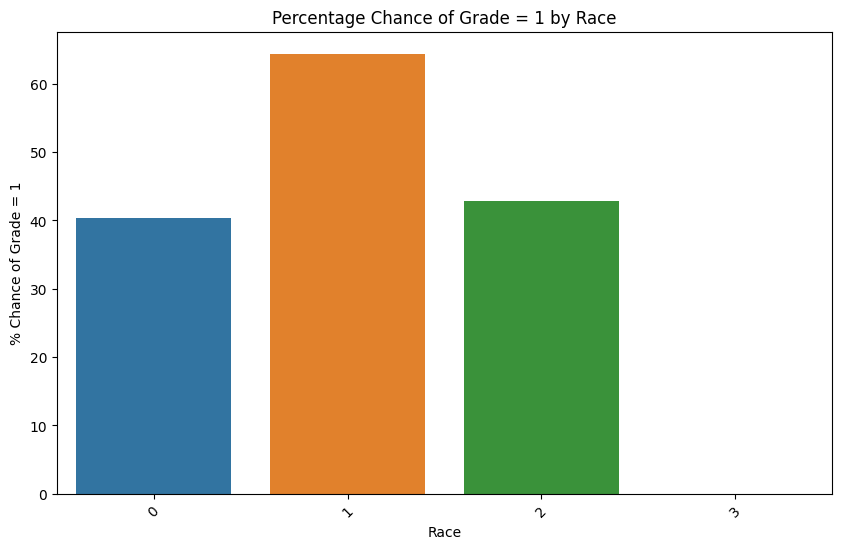

In [ ]:
# Filter the DataFrame for Grade = 1 entries
grade1_data = mutation_data[mutation_data['Grade'] == 1]

# Calculate the percentage chance for each race category
total_counts = mutation_data['Race'].value_counts()
grade1_counts = grade1_data['Race'].value_counts()
race_percentages = (grade1_counts / total_counts) * 100

# Plotting the histogram
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sb.barplot(x=race_percentages.index, y=race_percentages.values)
plt.xlabel('Race')
plt.ylabel('% Chance of Grade = 1')
plt.title('Percentage Chance of Grade = 1 by Race')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.show()

#### Conclusions

As we can see, apparently, there are no positive entries for the third race, but if we check the dataset, we can see that we have a single entry for race = 3, which is not enough for a good sample size. As such this entry will be deleted later on. 

### 2.2.2 Positive Grading by Age

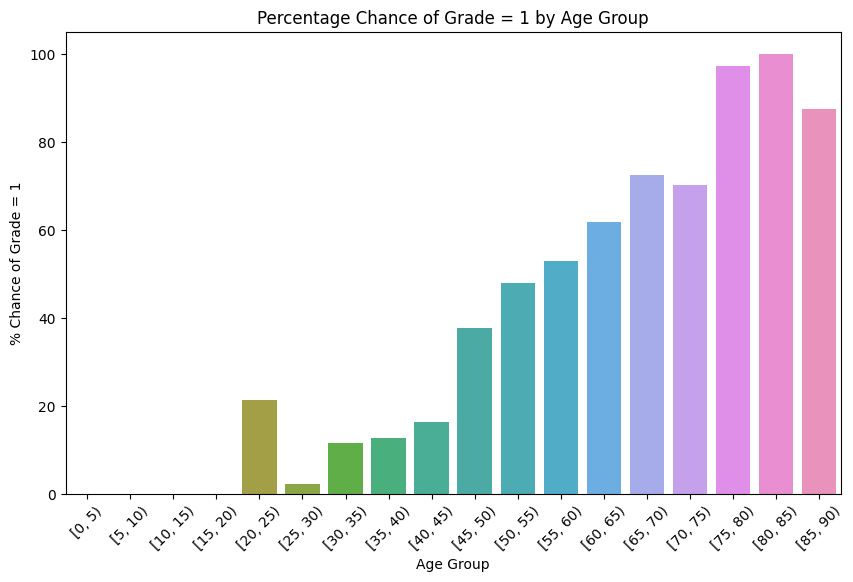

In [ ]:
# Group age values into intervals of 5
mutation_data['Age_Group'] = pd.cut(mutation_data['Age_at_diagnosis'], bins=range(0, int(mutation_data['Age_at_diagnosis'].max()) + 6, 5), right=False)

# Filter the Grade = 1 entries based on the updated DataFrame
grade1_data = mutation_data[mutation_data['Grade'] == 1]

# Calculate the percentage chance for each age group
total_counts = mutation_data['Age_Group'].value_counts()
grade1_counts = grade1_data['Age_Group'].value_counts()
age_percentages = (grade1_counts / total_counts) * 100

# Sort the age groups by their numerical order
age_percentages = age_percentages.sort_index()

# Plotting the histogram
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sb.barplot(x=age_percentages.index.astype(str), y=age_percentages.values)
plt.xlabel('Age Group')
plt.ylabel('% Chance of Grade = 1')
plt.title('Percentage Chance of Grade = 1 by Age Group')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.show()

#### Conclusions

From the 25, to the 90 age gap, we can see a clear increase on the percentage of positive grading, however we can see that the 20-25 age gap is a bit of an outlier. However, if we calculate the percentage of the size of the sample with the following code 

In [7]:
count = (mutation_data['Age_at_diagnosis'].between(20, 25)).sum()
total_entries = len(mutation_data)

print(str(round(count/total_entries * 100,3)) + "%")

3.337%


As this sample size is significant (3.337%), we will, even if this data does not follow the expected values, keep these entries. 

### 2.2.3 Dataset Balancing

To create a more accurate model, we need to have a balanced dataset, which means, in this case, that we should have similar amounts of positive and negative entries for the grade class. We can check this balance by creating a plot graph.

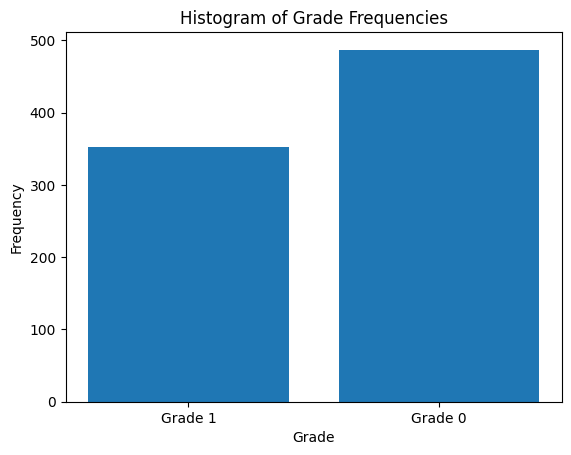

In [4]:
# Count the occurrences of each class
grade_1_count = (mutation_data['Grade'] == 1).sum()
grade_0_count = (mutation_data['Grade'] == 0).sum()

# Create a bar plot for the class frequencies
plt.bar(['Grade 1', 'Grade 0'], [grade_1_count, grade_0_count])

# Set labels and title
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Histogram of Grade Frequencies')

# Display the histogram
plt.show()

As we can see, we have slightly more negative entries than positive entries. This means that our dataset is slightly unbalanced. To fix this we can either change certain entries where the grading is negative to be positive, or simply remove them.

## 3 Dataset Cleaning

This section will be dedicated to removing faulty entries from the dataset in order to create a correct model. The cleaned data will then be exported to a new ```.csv``` file (```data/mutation_data_clean.csv```)

### 3.1 Insufficient Race Entries

We do not have enough race entries, as discussed in point [2.2.1](#2.2.1) and as such, all entries for race 3 will be removed from the dataset.

In [ ]:
# Remove the entries with race = 3
# TBD

### 3.2

TBD

### 3.3 Unbalanced Dataset

As discussed in section 2.2.3 The dataset is currently oversampled by grade = 1 entries. To fix this we can randomly undersample the majority class and oversample the minority class with the following script

In [2]:
print(mutation_data['Grade'].value_counts())

# Separate the majority and minority classes
majority_class = mutation_data[mutation_data['Grade'] == 0]
minority_class = mutation_data[mutation_data['Grade'] == 1]

# Perform random oversampling of the minority class
if len(minority_class) < len(majority_class):
    oversampled_minority = minority_class.sample(n=len(majority_class), replace=True, random_state=42)
    oversampled_minority_labels = oversampled_minority['Grade']
else:
    oversampled_minority = minority_class
    oversampled_minority_labels = minority_class['Grade']

# Perform random undersampling of the majority class
if len(majority_class) < len(minority_class):
    undersampled_majority = majority_class.sample(n=len(minority_class), replace=False, random_state=42)
    undersampled_majority_labels = undersampled_majority['Grade']
else:
    undersampled_majority = majority_class
    undersampled_majority_labels = majority_class['Grade']

# Combine the resampled classes
resampled_data = pd.concat([oversampled_minority, undersampled_majority])
resampled_labels = pd.concat([oversampled_minority_labels, undersampled_majority_labels])

# Display the class distribution after resampling
print(resampled_labels.value_counts())

0    487
1    352
Name: Grade, dtype: int64
1    487
0    487
Name: Grade, dtype: int64


Then, after making these changes, we can save then to the local variable ```mutation_data``` and visualize them with a new graph.

In [ ]:
mutation_data = pd.concat([resampled_data, resampled_labels], axis=1)

# Count the occurrences of each class
grade_1_count = (resampled_data['Grade'] == 1).sum()
grade_0_count = (resampled_data['Grade'] == 0).sum()

# Create a bar plot for the class frequencies
plt.bar(['Grade 1', 'Grade 0'], [grade_1_count, grade_0_count])

# Set labels and title
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Histogram of Grade Frequencies')

# Display the histogram
plt.show()

## 4. Saving Changes to CSV

After analyzing and changing the dataset to create a more accurate model, we can the dataset to a new ```.csv``` file in ```data/mutation_data_clean.csv```

In [ ]:
# Save the data to a new CSV file
resampled_data.to_csv('data/mutation_data_clean.csv', index=False)